### 1. Carregando Bibliotecas

In [160]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D, BatchNormalization
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
cifar10

<module 'keras.datasets.cifar10' from 'c:\\Users\\KAIQUEHENRIQUEVALIM\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\datasets\\cifar10.py'>

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


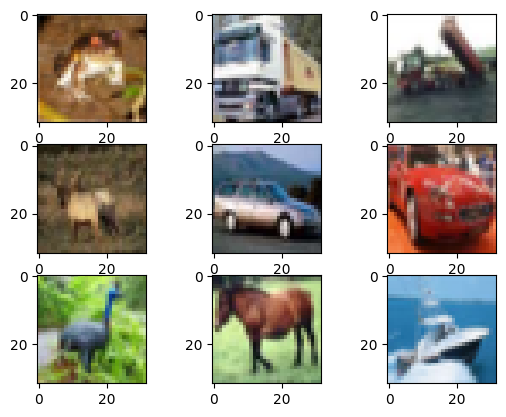

In [21]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [22]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [23]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
num_classes

10

In [26]:
x_train.shape

(50000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [27]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [28]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [29]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [30]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [31]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))                        
# #model.add(Conv2D(32, (3,3)),  activation='relu', input_shape=(32, 32, 3)))                        

# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(32, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(num_classes, activation='softmax'))

In [140]:
# # Cria o modelo
# model = Sequential()

# # Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
# model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))
# print('Conv2D ', model.output_shape)

# # Camada de Pooling 	    
# model.add(MaxPooling2D(pool_size=(2, 2)))
# print('MaxPooling2D ', model.output_shape)

# # Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
# model.add(Conv2D(64, (5, 5), activation='relu'))
# print('Conv2D ', model.output_shape)

# # Remove 20% das ativações de entrada aleatoriamente 
# model.add(Dropout(0.4))

# # Camada de Pooling 	
# model.add(MaxPooling2D(pool_size=(2, 2)))
# print('MaxPooling2D ', model.output_shape)

# # Remove 20% das ativações de entrada aleatoriamente 
# model.add(Dropout(0.2))

# # Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
# model.add(Flatten())
# print('Flatten ', model.output_shape)

# # Função de Ativação ReLu
# model.add(Dense(64, activation='relu'))
# print('Dense ', model.output_shape)

# # Função de Ativação ReLu
# model.add(Dense(32, activation='relu'))
# print('Dense ', model.output_shape)

# # Função de Ativação ReLu
# model.add(Dense(16, activation='relu'))
# print('Dense ', model.output_shape)

# # Função de Ativação Softmax
# model.add(Dense(num_classes, activation='softmax'))
# print('Dense ', model.output_shape)

Conv2D  (None, 30, 30, 32)
MaxPooling2D  (None, 15, 15, 32)
Conv2D  (None, 11, 11, 64)
MaxPooling2D  (None, 5, 5, 64)
Flatten  (None, 1600)
Dense  (None, 64)
Dense  (None, 32)
Dense  (None, 16)
Dense  (None, 10)


In [ ]:
# model = models.Sequential() 
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
# model.add(layers.MaxPooling2D((2, 2))) 
# model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# model.add(layers.Flatten()) 
# model.add(layers.Dense(64, activation='relu')) 
# model.add(layers.Dropout(0.5)) 
# model.add(layers.Dense(10))

In [161]:
# Definindo a arquitetura do modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

In [162]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [163]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

In [164]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [165]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

hist = model.fit(x_train, y_train, batch_size=64, epochs=20000, validation_data=(x_valid, y_valid), callbacks=[checkpointer, early_stopping], verbose=1, shuffle=True)


Epoch 1/20000
703/704 [============================>.] - ETA: 0s - loss: 1.5419 - accuracy: 0.4888
Epoch 1: val_accuracy did not improve from 0.74860
704/704 [==============================] - 87s 123ms/step - loss: 1.5418 - accuracy: 0.4888 - val_loss: 1.1061 - val_accuracy: 0.5958
Epoch 2/20000
703/704 [============================>.] - ETA: 0s - loss: 1.0039 - accuracy: 0.6440
Epoch 2: val_accuracy did not improve from 0.74860
704/704 [==============================] - 87s 123ms/step - loss: 1.0040 - accuracy: 0.6440 - val_loss: 0.9453 - val_accuracy: 0.6664
Epoch 3/20000
703/704 [============================>.] - ETA: 0s - loss: 0.8677 - accuracy: 0.6942
Epoch 3: val_accuracy did not improve from 0.74860
704/704 [==============================] - 88s 125ms/step - loss: 0.8678 - accuracy: 0.6942 - val_loss: 0.8347 - val_accuracy: 0.7076
Epoch 4/20000
703/704 [============================>.] - ETA: 0s - loss: 0.7827 - accuracy: 0.7225
Epoch 4: val_accuracy improved from 0.74860 to 0.

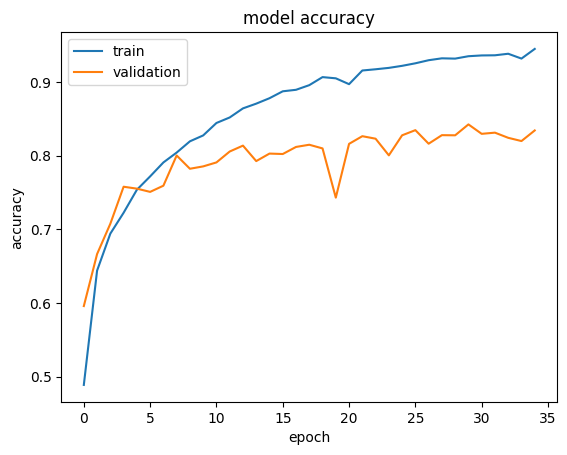

In [166]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

O modelo manteve a acuracia de validação em torno dos 80% +- depois da 10ª epoca, e depois foi acontecendo um overfiting nos dados de treino, vamos ver em qual epoca houve o pico que ficou proximo da acurácia de treino. O que poderia ter evitado isso também é ter acompanhada a val_loss no EarlyStopping.

In [185]:
hist.history['val_loss'][:20]

[1.1061477661132812,
 0.9453314542770386,
 0.8346707820892334,
 0.6944208145141602,
 0.7017087340354919,
 0.7306729555130005,
 0.7030019760131836,
 0.5791935324668884,
 0.6405355334281921,
 0.6326407194137573,
 0.6208457350730896,
 0.5749221444129944,
 0.5792216062545776,
 0.6274139881134033,
 0.5928361415863037,
 0.6274879574775696,
 0.5971308350563049,
 0.5708330273628235,
 0.621218740940094,
 1.0142954587936401]

In [183]:
hist.history['val_accuracy'][:10]
# 8 epocas

[0.59579998254776,
 0.6664000153541565,
 0.7075999975204468,
 0.7577999830245972,
 0.7552000284194946,
 0.7508000135421753,
 0.7591999769210815,
 0.8001999855041504,
 0.7821999788284302,
 0.7853999733924866]

In [ ]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=8, validation_data=(x_valid, y_valid), callbacks=[checkpointer, early_stopping], verbose=1, shuffle=True)

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [167]:
model = load_model("modelocifar_FIAP_CNN.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [168]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8234000205993652


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [169]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [170]:
y_hat = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


In [171]:
y_hat

array([[1.8545711e-07, 2.9014991e-08, 3.2938335e-06, ..., 2.2003800e-07,
        4.0079968e-04, 1.3210624e-07],
       [8.9009825e-07, 3.4970537e-06, 3.4597954e-13, ..., 3.5974528e-17,
        9.9999559e-01, 1.1135398e-10],
       [9.2102473e-06, 1.8163836e-02, 6.7654077e-11, ..., 8.8899756e-11,
        9.2729080e-01, 5.4536194e-02],
       ...,
       [3.3040322e-12, 1.2996015e-11, 3.3651580e-05, ..., 1.4866497e-07,
        1.0936643e-08, 5.2443244e-10],
       [5.2781450e-03, 9.9457461e-01, 1.7787834e-05, ..., 3.4578918e-08,
        1.7540687e-09, 1.2358253e-06],
       [5.6208831e-12, 5.0619492e-10, 4.5646978e-10, ..., 9.9984467e-01,
        3.9454126e-12, 4.4019333e-14]], dtype=float32)

In [172]:
y_hat[100,:]

array([5.1021679e-08, 6.3223649e-12, 3.7725365e-06, 2.0972034e-06,
       4.5124477e-01, 4.6536211e-06, 1.2390171e-10, 5.4874468e-01,
       8.8733785e-09, 8.2593266e-09], dtype=float32)

In [173]:
np.argmax(y_hat[100,:])

7

In [174]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [175]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

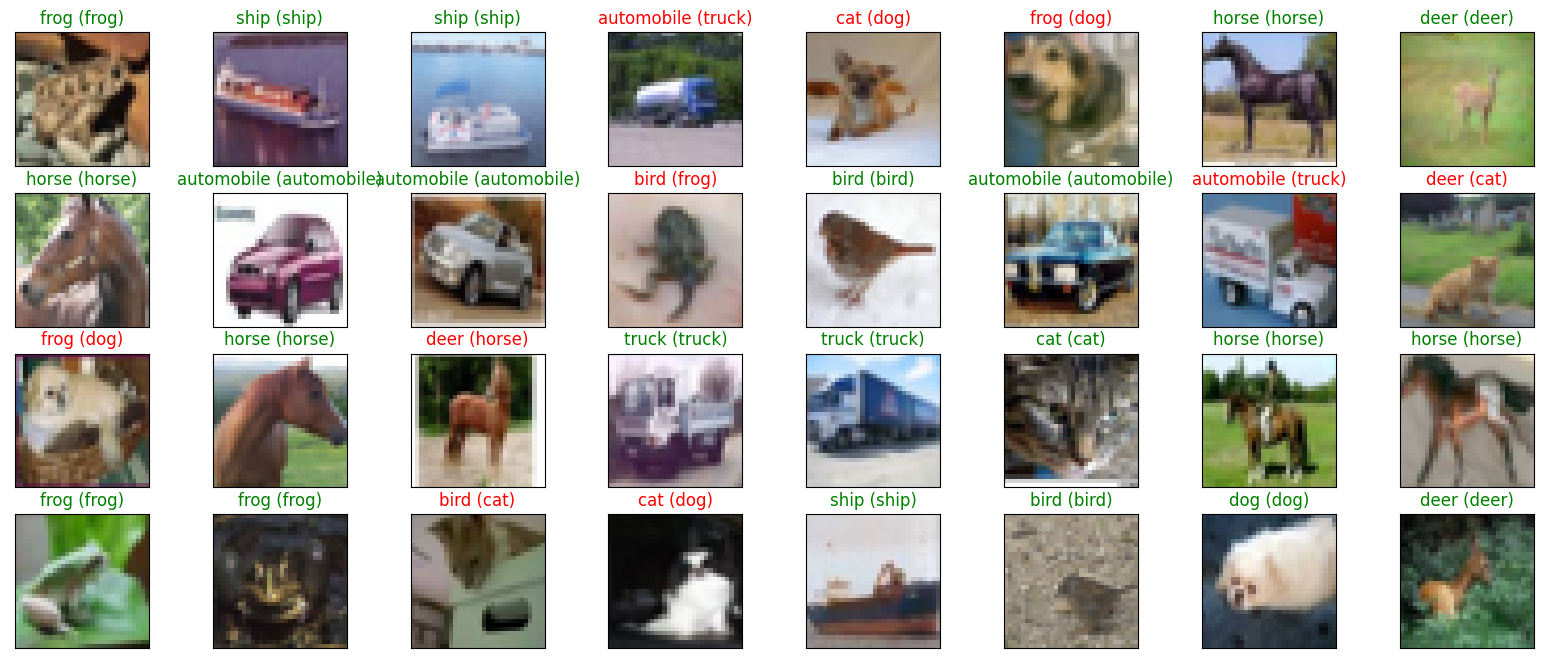

In [176]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
